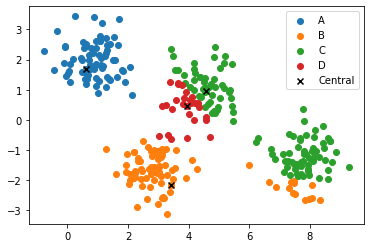

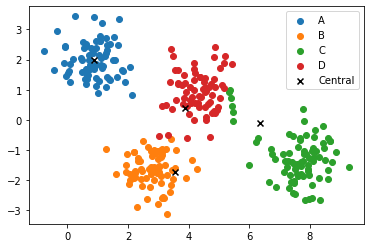

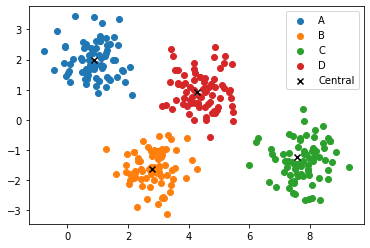

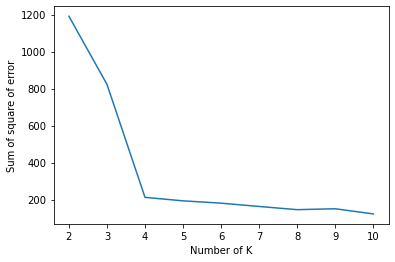

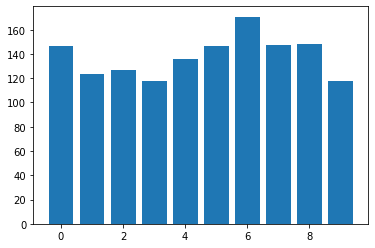

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plot_or_not is for drawing scatter plot
def iteration(data,dots,centroids,elbow,plot_or_not):
    data_copy=data.copy() #make a copy, or it will alter original data
    #first cluster
    team=[]
    for dot in dots:
        temp=[]
        for centroid in centroids:
            distance=np.linalg.norm(dot-centroid) #count the distance between each dot and k centroids
            temp.append(distance)
        nearest=temp.index(min(temp)) # give every dot a cluster, choose the nearest one as its centroid
        team.append(nearest)
    data_copy['first cluster']=team #every data will be given a cluster(0-k), showing which group it belongs to
    new=data_copy.groupby('first cluster')
    new_centroids=np.array(new.mean()) #using mean of all the elements in that group to generate new centroid

    if plot_or_not:
        plot_scatter(data_copy,dots,centroids) 

    difference=0 #the biggest difference between current dot and former dot
    for i in range(len(centroid)):
        if np.linalg.norm(centroids[i]-new_centroids[i])>difference: #to record the biggest gap
            difference=np.linalg.norm(centroids[i]-new_centroids[i])
    if difference>0.1: #my threshold, if lower than 0.1, stop iterating
        iteration(data_copy,dots,new_centroids,elbow,plot_or_not)
    else: 
        new_centroids=list(new_centroids)
        total=0
        for i in range(len(new_centroids)):
            X=new.get_group(i)['x']-new_centroids[i][0] #x gap of a group
            Y=new.get_group(i)['y']-new_centroids[i][1] #y gap of a group
            result=X**2+Y**2 #sum of square of a group
            total+=result.sum() #sum of square of all the groups
        elbow.append(total)
        
def plot_scatter(data,dots,centroids):
    plt.figure()
    centroids=np.hsplit(centroids,2) #split [[x,y],[x,y]..] into [[x,x,..],[y,y,...]]

    groups=data.groupby('first cluster')
    for name, group in groups: #draw every group with different color
        plt.scatter(group['x'],group['y'],label=chr(name+65))
    plt.scatter(centroids[0],centroids[1],marker='x',c='black',label='Central') #draw centroids
    plt.legend()
    
def plot_elbow(elbow,k):
    plt.figure()
    k=[i for i in range(2,k)]
    plt.xlabel('Number of K')
    plt.ylabel('Sum of square of error')
    plt.plot(k,elbow)
    
def plot_histo(elbow,k):
    k=[i for i in range(k)]
    plt.figure()
    plt.bar(k,elbow)
        
        
#read the csv and get rid of the cluster column
elbow=[]
data=pd.read_csv('cdata.csv') 
data=data.drop('cluster',axis=1)

#pick initial k random centroids, dots:all the other dots
k=4
centroids=data.sample(n=k) 
centroids=np.array(centroids) 
dots=np.array(data) 
iteration(data,dots,centroids,elbow,True)

elbow.clear()

#quite the same, k=2-10
k=11
for i in range(2,k):
    centroids=data.sample(n=i) #k centroids(np array)
    centroids=np.array(centroids) 
    dots=np.array(data) #all the dots(np array)
    iteration(data,dots,centroids,elbow,False)
plot_elbow(elbow,k)

elbow.clear()

#k=10 for 10 times
k=10
for i in range(k):
    centroids=data.sample(n=k) #k centroids(np array)
    centroids=np.array(centroids) 
    dots=np.array(data) #all the dots(np array)
    iteration(data,dots,centroids,elbow,False)
plot_histo(elbow,k)   
  







5
